### Packages Required

In [82]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
import keras
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Activation,Flatten,Dropout,Reshape,InputLayer,Convolution2D,MaxPooling2D,Reshape
from matplotlib.pyplot import imread,imshow
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from skimage.transform import resize

### Datasets

In [68]:
path = 'C:/Users/Nithin/Downloads/Age Detection using Image/'
train = pd.read_csv(path + 'Datasets/train.csv')
test = pd.read_csv(path + 'Datasets/test.csv')

Age:  MIDDLE


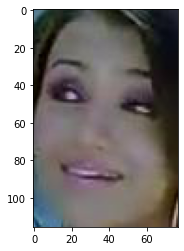

In [64]:
rands = random.choice(train.index)
img_name = train.ID[rands]
img = imread(os.path.join(path + 'Datasets', 'Train', img_name))

imshow(img)
print('Age: ', train.Class[i])

In [70]:
temp = []
for img_name in train.ID:
    img_path = os.path.join(path + 'Datasets', 'Train', img_name)
    img = imread(img_path)
    img = resize(img, (32, 32))
    img = img.astype('float32') 
    temp.append(img)
    #print(1)
train_x = np.stack(temp)

In [75]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(path + 'Datasets', 'Test', img_name)
    img = imread(img_path)
    img = resize(img, (32, 32))
    img = img.astype('float32') 
    temp.append(img)
    #print(1)
test_x = np.stack(temp)

In [80]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [81]:
# Normalising the Images
train_x = train_x / 255.
test_x = test_x / 255.

In [83]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.to_categorical(train_y)

### Model Building

In [90]:
batch_size = 250
epochs = 100

input_shape = (32, 32, 3)
pool_size = (2, 2)
output_num_units = train.Class.nunique()

In [87]:
M0 = Sequential()
M0.add(InputLayer(input_shape=input_shape))

M0.add(Convolution2D(96,(3,3),activation='relu'))
M0.add(MaxPooling2D(pool_size=pool_size))
M0.add(Dropout(0.25))

M0.add(Convolution2D(256,(2,2),activation='relu'))
M0.add(MaxPooling2D(pool_size=pool_size))
M0.add(Dropout(0.3))

M0.add(Convolution2D(256,(2,2),activation='relu'))
M0.add(MaxPooling2D(pool_size=pool_size))
M0.add(Dropout(0.25))

M0.add(Flatten())

M0.add(Dense(384, activation='relu'))
M0.add(Dense(1536, activation='relu'))
M0.add(Dense(output_num_units,activation='softmax'))

M0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 96)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       98560     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 256)         0

In [88]:
M0.compile(optimizer='Adam', loss='categorical_crossentropy',metrics = ['accuracy'])

In [91]:
M0.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 37s 574ms/step - loss: 0.9561 - accuracy: 0.5425 - val_loss: 0.9484 - val_accuracy: 0.5439
Epoch 2/100
64/64 [==============================] - 35s 541ms/step - loss: 0.9554 - accuracy: 0.5425 - val_loss: 0.9549 - val_accuracy: 0.5439
Epoch 3/100
64/64 [==============================] - 35s 543ms/step - loss: 0.9553 - accuracy: 0.5425 - val_loss: 0.9495 - val_accuracy: 0.5439
Epoch 4/100
64/64 [==============================] - 32s 504ms/step - loss: 0.9558 - accuracy: 0.5425 - val_loss: 0.9484 - val_accuracy: 0.5439
Epoch 5/100
64/64 [==============================] - 32s 497ms/step - loss: 0.9517 - accuracy: 0.5425 - val_loss: 0.9350 - val_accuracy: 0.5439
Epoch 6/100
64/64 [==============================] - 31s 489ms/step - loss: 0.9440 - accuracy: 0.5413 - val_loss: 0.9322 - val_accuracy: 0.5439
Epoch 7/100
64/64 [==============================] - 31s 479ms/step - loss: 0.9256 - accuracy: 0.5430 - val_loss: 0.9050 - val_accuracy:

In [92]:
M0.save(path + 'Model/Age Detection_M0.h5')

In [93]:
pred = M0.predict(test_x)
pred.shape

208/208 [==============================] - 7s 18ms/step


(6636, 3)

In [100]:
test['Age'] = np.argmax(pred,axis=1) 
test.head(5)

,ID,Age
0,25321.jpg,1
1,989.jpg,2
2,19277.jpg,0
3,13093.jpg,0
4,5367.jpg,0
